# A Brief Introduction to Python
## Infrastrukturen Engineering
## HafenCity Universität Hamburg (HCU)
### The University Of The Built Environment And Metropolitan Development

## Modul: BIW-M-211-100 Energie-Infrastructur
## Instructors:
### Prof. Dr.-Ing. Ingo Weidlich
### Pakdad Pourbozorgi Langroudi

In [ ]:
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")

if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/gdrive'
  print("Colab: mounting Google drive on ", mount)

  drive.mount(mount)

  # Switch to the directory on the Google Drive that you want to use
  import os
  drive_root = mount + "/MyDrive/MyCourses"
  
  # Create drive_root if it doesn't exist
  create_drive_root = True
  if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)
  
  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root
  if os.path.isdir(drive_root+'/Energieinfrastruktur'):
    drive_root = drive_root+'/Energieinfrastruktur'
    %cd $drive_root
    ! git pull
  else:
    ! git clone https://github.com/pakdad/Energieinfrastruktur.git
    drive_root = drive_root+'/Energieinfrastruktur'
    %cd $drive_root

# Regression Analysis
## Using Numpy, Pandas, Matplotlib, and Sklearn Lirbaries

In [31]:
# Import necessary libraries
# Using np as numpy, pd as pandas and plt as pyplot is a convention,
# and it is recomended to keep it as this format in your codes.
from statistics import mean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')
#%matplotlib inline

In [32]:
# reading our data file directly with numpy.
df = pd.read_csv('Data/regression.csv', index_col=0)
df.head() # method head returns the first five rows of the dataframe
# to see the last five rows the method tail could be used.
#df.tail()
# to see arbitrary row numbers, the number could be given in method head or tail as follow:
#df.head(10)

,xs,ys
0,80.0,49.00
1,80.0,51.85
2,80.0,50.70
3,81.0,50.55
4,81.0,47.40


In [33]:
# function len Return the number of items in a list, array, dataframe, ...:
len(df)

200

In [34]:
df.describe()

,xs,ys
count,200.000000,200.000000
mean,100.000000,34.675000
std,11.669657,9.256812
min,80.000000,16.450000
25%,90.000000,27.587500
50%,100.000000,34.000000
75%,110.000000,42.212500
max,120.000000,52.100000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   xs      200 non-null    float64
 1   ys      200 non-null    float64
dtypes: float64(2)
memory usage: 4.7 KB


The Linear Equation Is:
Mathematically, a linear relationship is one that satisfies the equation:

\begin{aligned} &y = mx + b \\ &\textbf{where:}\\ &m=\text{slope}\\ &b=\text{y-intercept}\\ \end{aligned} 
“x” and “y” are two variables which are related by the parameters “m” and “b”. Graphically, y = mx + b plots in the x-y plane as a line with slope “m” and y-intercept “b.” The y-intercept “b” is simply the value of “y” when x=0. The slope “m” is calculated from any two individual points (x1, y1) and (x2, y2) as:

\begin{aligned}m = \frac{(y_2 - y_1)}{(x_2 - x_1)}
\end{aligned}

In [ ]:
PEMDAS

In [43]:
print(5-2*3)

-1


In [41]:
list_1 = [1,2,3,5]

In [42]:
mean(list_1)

2.75

In [44]:
def best_fit_slope(xs, ys):
    ''' This function fits the regression line and find the slope and intercept '''
    m = ( ((mean(xs)*mean(ys)) - (mean(xs*ys))) /
         (mean(xs)**2  - mean(xs**2)) )
    b = mean(ys) - m*mean(xs)
    return m, b

def se(ys, regression):
    ''' This function returns the squared error '''
    return sum((ys-regression)**2)

def cod(ys, regression):
    ''' This function returns the Coefficient of determination (r^2) '''
    ys_mean = [mean(ys) for y in ys]
    reg_se = se(ys, regression)
    ys_se = se(ys, ys_mean)
    cod = 1 - (reg_se/ys_se)
    return cod

In [45]:
# find the slope and intecept of regression line
m, b = best_fit_slope(df['xs'], df['ys'])
regression = m*df['xs']+b

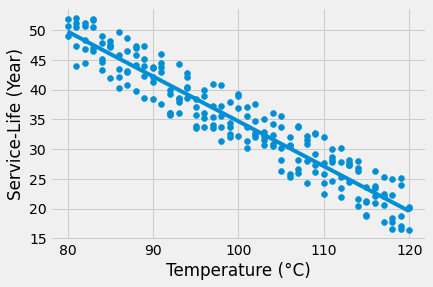

In [49]:
# Visualize our data and regression line
plt.scatter(df['xs'], df['ys'])
plt.plot(df['xs'], regression, )
plt.xlabel('Temperature (°C)')
plt.ylabel('Service-Life (Year)')
plt.show()

In [50]:
m

-0.7547416974169736

In [51]:
b

110.14916974169735

In [52]:
# predict a service life of a pipe if we operate it on 95°c
predict_x = 95
predict_y = (m*predict_x)+b
print(predict_y) # our prediction
print(cod(df['ys'], regression)) # the accuracy

38.44870848708486
0.9052947851130926


In [ ]:
# Visualize our data and regression line including the predicted point
plt.scatter(df['xs'], df['ys'])
plt.scatter(predict_x, predict_y, s=100, color='red')
plt.plot(df['xs'], regression)
plt.xlabel('Temperature (°C)')
plt.ylabel('Year')
plt.show()

In [ ]:
# we can check the standard deviation
np.std(df['ys'])

The Formula for Multiple Linear Regression Is
\begin{aligned} &y_i = \beta_0 + \beta _1 x_{i1} + \beta _2 x_{i2} + ... + \beta _p x_{ip} + \epsilon\\ &\textbf{where, for } i = n \textbf{ observations:}\\ &y_i=\text{dependent variable}\\ &x_i=\text{expanatory variables}\\ &\beta_0=\text{y-intercept (constant term)}\\ &\beta_p=\text{slope coefficients for each explanatory variable}\\ &\epsilon=\text{the model's error term (also known as the residuals)}\\ \end{aligned} 

In [53]:
# reading a dataframe for Multiple Linear Regression
df = pd.read_csv('Data\multi_regression.csv', delimiter=",")
df

,Unnamed: 0,Age,Temperature,Flow_Rate,Pipe_type
0,0,10.0,118.0,8973.0,1
1,1,10.0,120.8,9223.0,1
2,2,10.0,119.6,8988.0,1
3,3,11.0,115.4,9223.0,1
4,4,11.0,122.2,9225.0,1
...,...,...,...,...,...
195,195,49.0,84.0,3496.0,1
196,196,49.0,82.8,3235.0,1
197,197,50.0,84.6,2744.0,1
198,198,50.0,77.4,3138.0,1


In [54]:
# drop the unnamed: 0 column
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Age,Temperature,Flow_Rate,Pipe_type
0,10.0,118.0,8973.0,1
1,10.0,120.8,9223.0,1
2,10.0,119.6,8988.0,1
3,11.0,115.4,9223.0,1
4,11.0,122.2,9225.0,1


In [56]:
# check the linearity with our defined single linearity
# regression function for the columns age and temperature
m, b = best_fit_slope(df['Age'], df['Temperature'])
regression = m*df['Age']+b

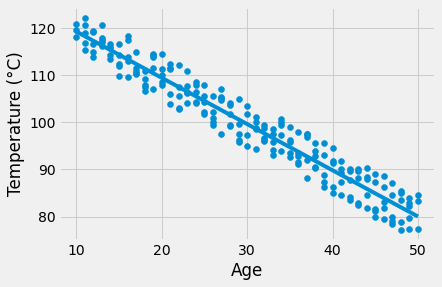

In [57]:
# visualize our regression fit
plt.scatter(df['Age'], df['Temperature'])
plt.plot(df['Age'], regression)
plt.xlabel('Age')
plt.ylabel('Temperature (°C)')
plt.show()

In [58]:
# we can apply the same principle for the columns age and flow rate
m, b = best_fit_slope(df['Age'], df['Flow_Rate'])
regression = m*df['Age']+b

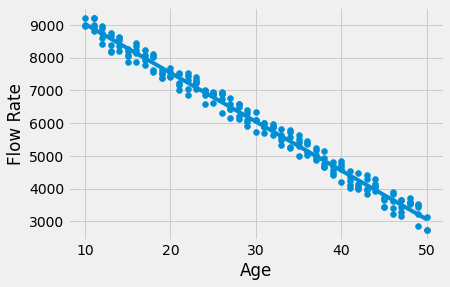

In [59]:
# visualize our regression fit
plt.scatter(df['Age'], df['Flow_Rate'])
plt.plot(df['Age'], regression)
plt.xlabel('Age')
plt.ylabel('Flow Rate')
plt.show()

In [60]:
# read two more data frames
df2 = pd.read_csv('Data\multi_regression2.csv', delimiter=",")
df3 = pd.read_csv('Data\multi_regression3.csv', delimiter=",")
# concatanate the dataframes to form a single large dataframe
frames = [df, df2, df3]
df = pd.concat(frames)
df.describe() # this method describes the dataframe characteristics

,Age,Temperature,Flow_Rate,Pipe_type,Unnamed: 0
count,600.000000,600.000000,600.000000,600.000000,400.000000
mean,51.666667,99.451667,6014.798333,2.000000,99.500000
std,22.350723,11.932825,1742.914977,0.817178,57.806609
min,10.000000,75.800000,2744.000000,1.000000,0.000000
25%,35.000000,89.600000,4490.000000,1.000000,49.750000
50%,50.000000,99.400000,6026.500000,2.000000,99.500000
75%,67.000000,109.650000,7481.750000,3.000000,149.250000
max,100.000000,122.600000,9294.000000,3.000000,199.000000


In [61]:
df.head()

,Age,Temperature,Flow_Rate,Pipe_type,Unnamed: 0
0,10.0,118.0,8973.0,1,NaN
1,10.0,120.8,9223.0,1,NaN
2,10.0,119.6,8988.0,1,NaN
3,11.0,115.4,9223.0,1,NaN
4,11.0,122.2,9225.0,1,NaN


In [62]:
# drop the non relevant columns and shuffle it to imitate a real-world dataset
df = df.drop(['Unnamed: 0'], axis=1)
df = df.sample(frac = 1).reset_index()
df = df.drop(['index'], axis=1)
df.head()

,Age,Temperature,Flow_Rate,Pipe_type
0,58.0,116.0,7783.0,3
1,21.0,111.2,7212.0,1
2,98.0,81.4,3283.0,3
3,99.0,75.8,3312.0,3
4,38.0,90.2,4653.0,1


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [63]:
# Features are X and lables are y
X = np.array(df.drop(['Age'], 1))
y = np.array(df['Age'])

X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = round(clf.score(X_test, y_test), 4)*100
print(f"The accuracy of the trained model with LinearRegression is : {accuracy}%")


The accuracy of the trained model with LinearRegression is : 99.0%


In [64]:
forecast_set = clf.predict(X)
#print(forecast_set, accuracy)
df = df.assign(Forecast = forecast_set)

In [65]:
df

,Age,Temperature,Flow_Rate,Pipe_type,Forecast
0,58.0,116.0,7783.0,3,60.288654
1,21.0,111.2,7212.0,1,19.881215
2,98.0,81.4,3283.0,3,93.571379
3,99.0,75.8,3312.0,3,94.666951
4,38.0,90.2,4653.0,1,39.105896
...,...,...,...,...,...
595,43.0,88.2,4293.0,1,41.595728
596,25.0,105.6,6931.0,1,22.733342
597,45.0,87.4,3706.0,1,45.101834
598,55.0,115.4,8597.0,3,55.811271


# 